In [19]:
!pip install tabulate colorama


En un bioproceso, la melaza se fermenta para producir un licor que contiene alcohol etílico. Se desarrolla un vapor rico en CO2 con una pequeña cantidad de alcohol etílico. El alcohol se recupera en una columna de absorción.

La entrada de gas es de 200 kmol/h; 98% de CO2, 2% de alcohol etílico; 30°C, 1.036 atm.
El absorbente líquido que ingresa es 100% agua; 30°C, 1.036 atm

La recuperación requerida (absorción) del alcohol etílico es del 99%

La relación entre el flujo del gas y el liquido es de 1.25.
Se propone una caída de presión para el proceso de 0.25in H2O/ft y un empaque de Anillos Pall metálicos de 1.5 in.

Es necesario insertar en el código valores de viscosidad, tensión superficial, difusividad y viscosidad cinemética para la fase vapor y líquida.

In [20]:
#Empaque Pall Rings Metal 1.5 in
from math import sqrt,pi,log
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style
D_in=1.5/12 #ft
Fp=40 #Factor de empaquetamiento
epsilon=0.95 # porosidad (Depende del empaque)
a=39 #ft^2/ft^3 Area total (Depende del empaque)
PMet=46 #gr/mol
PMCO2=44 #gr/mol
PMH2O=18 #gr/mol
xTH2O=1
xTet=0
ybet=0.02 #Fracción etanol entrada
ybCO2=0.98
R=8.314 #J/mol K
p=105000 #Pa
T=303.15 #K
rhoLT=62.16 #lb/ft^3
Vbm=200 #kmol/h  #Flujo de entrada de gas
CaidaProceso=0.25 #in H2O/ft Caída de Presión
r=1.25 #relación entre los flujos
v=0.86 #cst #viscosidad cinemática
#Factores del empaque ver Tabla 6.6 del libro de Separation Process Principle de Seader
a=42.3672 #ft^2/ft^3
g=32.2 #lb/ft^2*s #Gravedad en sistema inglés
sigma=0.2248 #lb/ft #Tensión superficial del agua
Ch=0.644
v1=6.89e-6 #ft^2/s
rec=0.99 #fracción recuperada
def PM(p1,y1,p2,y2):
  return (p1*y1+p2*y2)

def rhoY(PM):
  return (p*PM)/(R*T*1000)

def Flujo(molar,PM):
  return molar*PM*2.204

def Flujomol(Gx,Area,PM):
  return Gx*Area/(2.204*PM)
def axisx(rhox,rhoy,r):
  return (r*sqrt(rhoy/rhox))

def CaidMax(Fp):
  return 0.115*(Fp**0.7)

def Cs(Axisy,Fp,cstk):
  return Axisy/(sqrt(Fp)*cstk**0.05)

def uo(rhox,rhoy,Cs):
  return Cs*sqrt((rhox-rhoy)/rhoy)

def Gy(u0,rhoY):
  return u0*rhoY

def Area(Gy,Vbv):
  return Vbv/Gy

def Diametro(Area):
  return sqrt(Area*4/pi)

def Equilibrio(x):
  Actividad=6
  Pvap=10.5
  PT=105
  return (Actividad*x*Pvap)/(PT)

def NOy(yb,yT,yb_eq,yT_eq):
  return (yb-yT)/(((yb-yb_eq)-(yT-yT_eq))/log(((yb-yb_eq))/((yT-yT_eq))))
rhoVb=rhoY(PM(PMet,ybet,PMCO2,ybCO2))/16.02 #Cálculo de la densidad del flujo de gas
Vbv=Flujo(Vbm,PM(PMet,ybet,PMCO2,ybCO2))
xaxis1=(axisx(rhoLT,rhoVb,r)) #Función que determina el valor x de la gráfica de caída de presión
CaidaMax=CaidMax(Fp) #La caída de presión máxima se asigna en función del tipo de empaque

data = {
  "Densidad Corriente gaseosa (lb/ft^3)": [rhoVb],
  "Flujo Másico Corriente Gasesosa (lb/h)": [Vbv],
  "Funcion x en la gráfica de caída de presión ": [xaxis1],
  "Caída de Presión estimada (in H2O/ft)": [CaidaProceso],
  "Caída de Presión Máxima (in H2O ft)":[CaidaMax],

}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)


+----+----------------------------------------+------------------------------------------+------------------------------------------------+-----------------------------------------+---------------------------------------+│
|    |   Densidad Corriente gaseosa (lb/ft^3) |   Flujo Másico Corriente Gasesosa (lb/h) |   Funcion x en la gráfica de caída de presión  |   Caída de Presión estimada (in H2O/ft) |   Caída de Presión Máxima (in H2O ft) |│
+====+========================================+==========================================+================================================+=========================================+=======================================+│
|  0 |                               0.114527 |                                  19412.8 |                                      0.0536547 |                                    0.25 |                               1.52104 |│
+----+----------------------------------------+------------------------------------------+------------------

# **LEA LA GRÁFICA EN FUNCIÓN DEL VALOR DE X OBTENIDO Y DE LA CAÍDA DE PRESIÓN DESEADA**
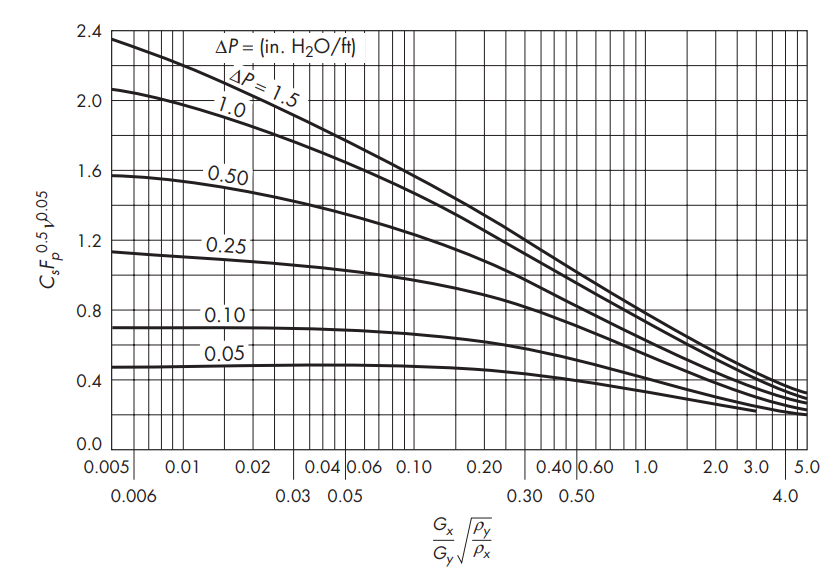

In [24]:
yaxis1=float(input("Inserte el valor del eje y para la gráfica de caída de presión del proceso: ")) #Inserte estos valores en función de lo leído en la gráfica
yaxis2=float(input("Inserte el valor del eje y para la gráfica de caída de presión máxima: "))
Cs1=Cs(yaxis1,Fp,v)
Cs2=Cs(yaxis2,Fp,v)
uo1=uo(rhoLT,rhoVb,Cs1) #Determina la velocidad superficial del gas de operación
uo2=uo(rhoLT,rhoVb,Cs2) #Determina la velocidad superficial del gas máxima

Gy1=Gy(uo1,rhoVb)*3600 #Gy operación
Gy2=Gy(uo2,rhoVb)*3600 #Gy máxima
Gx1=Gy1*r #Gx operación
Gx2=Gy2*r #Gx máxima
u01=Gx1/(rhoLT*3600) #Determina la velocidad superficial del líquido de operación
u02=Gx2/(rhoLT*3600) #Determina la velocidad superficial del líquido máxima

A1=Area(Gy1,Vbv) #Área operación
A2=Area(Gy2,Vbv) #Área máxima

D1=Diametro(A1) #Diámetro operación
D2=Diametro(A2) #Diámetro máximo
if D_in<(D1/8):
  print("El diámetro de empaque es adecuado con respecto al diámetro de columna")
else:
  print("El diámetro del empaque no es adecuado con respecto al diámetro de columna")

LTm=Flujomol(Gx1,A1,PMH2O)

EtTop=Vbm*ybet*(1-rec)
EtBot=Vbm*ybet*rec

LBm=EtBot+LTm #Se calculan las fracciones de los componentes de salida
VTm=EtTop+(Vbm*ybCO2)
ytet=EtTop/VTm
ytCO2=Vbm*ybCO2/VTm
xbet=EtBot/LBm
xbH2O=LTm/LBm



yT_eq=Equilibrio(xTet)
yb_eq=Equilibrio(xbet)
NU=NOy(ybet,ytet,yb_eq,yT_eq) #Se calcula el número de unidades de transferencia

def ReL(u0):
  return u0/(a*v1)
def FrL(u0):
  return (u0**2)*a/g
def ah(ReL,FrL):
  return 0.85*Ch*(ReL**0.25)*(FrL**0.1)*a
def hL(ReL,FrL,ah):
  return (((12*FrL)/ReL)**(1/3))*((ah/a)**(2/3))
ReL1=ReL(u01)
FrL1=FrL(u01)
ah1=ah(ReL1,FrL1)
hL1=hL(ReL1,FrL1,ah1)


dh=4*epsilon/a #diámetro hidráulico

def ReLh(u0):
  return u0*dh/v1

def WeLh(u0):
  return ((u0**2)*rhoLT*dh)/sigma

def FrLh(u0):
  return (u0**2)/(g*dh)

def aph(ReLh,WeLh,FrLh):
  return 1.5*((a*dh)**(-0.5))*(ReLh**(-0.2))*(WeLh**(0.75))*(FrLh**(-0.45))

CL=1.012 #Depende del empaque
DL=1.95e-8 #ft^2/s Difusividad del etanol (liq.)
def HL(u0,aph,hL):

  return (1/CL)*((1/12)**(1/6))*((4*hL*epsilon/(DL*a*u0))**0.5)*(u0/a)*(1/aph)
ReLh1=ReLh(u01)
WeLh1=WeLh(u01)
FrL1h=FrLh(u01)
aph1=aph(ReLh1,WeLh1,FrL1h)
HL1=HL(u01,aph1,hL1)

v2=8.07e-5 #ft^2/s #Visocidad del vapor de etanol

def ReV(u0):
  return u0/(a*v2)
DG=8.342e-5 #Difusividad del vapor de etanol
Cv=0.341 #Depende del factor de empaquetamiento

def HG(hL,ReV,ScV,aph,uo):
  return (1/Cv)*((epsilon-hL)**(0.5))*(((4*epsilon)/(a**4))**(1/2))*(ReV**(-3/4))*(ScV**(-1/3))*(uo/(DG*aph))
K=0.6 #Ley de Henry
ReV1=ReV(uo1)
ScV1=(v2)/(DG)
HG1=HG(hL1,ReV1,ScV1,aph1,uo1)
HGO=HG1+(K*Vbm/LTm)*HL1



data = {
  "Nivel de inundación de la columna (%)": [uo1*100/uo2],
  "Gy de operación (ft^2/h)": [Gy1],
  "Gx de operación (ft^2/h)": [Gx1],



}



df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)


data = {
  "Área (ft^2)": [A1],
  "Diámetro (ft)": [D1],
}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)


data = {
  "L_Entrada (kmol/h)": [A1],
  "L_Salida (kmol/h)": [LBm],
  "V_Salida (kmol/h)": [VTm],
  "VapEtanol_Salida (%)": [ytet*100],
  "VapCO2_Salida (%)": [ytCO2*100],
  "LiqEtanol_Salida (%)":[xbet*100],
  "LiqH2O_Salida (%)":[xbH2O*100]



}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)



data = {
  "Unidades de transferencia": [NU],
  "Altura (ft)": [HGO*NU],




}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)

Inserte el valor del eje y para la gráfica de caída de presión del proceso: 1.15
Inserte el valor del eje y para la gráfica de caída de presión máxima: 1.78
El diámetro de empaque es adecuado con respecto al diámetro de columna
+----+-----------------------------------------+----------------------------+----------------------------+│
|    |   Nivel de inundación de la columna (%) |   Gy de operación (ft^2/h) |   Gx de operación (ft^2/h) |│
+====+=========================================+============================+============================+│
|  0 |                                 64.6067 |                    1758.14 |                    2197.68 |│
+----+-----------------------------------------+----------------------------+----------------------------+│

+----+---------------+-----------------+│
|    |   Área (ft^2) |   Diámetro (ft) |│
+====+===============+=================+│
|  0 |       11.0417 |         3.74949 |│
+----+---------------+-----------------+│

+----+--------------